# Elbow Criteria

Deciding how many clusters are adequate to represent a sample.

First we generate a one-dimensional (for ease of visualization) sample composed of several normal distributions. The number of normal distributions used would be the "correct" number of clusters of the sample.

Change the means of the distribution to produce "closer" or "farther" clusters.

5


Text(0, 0.5, 'N')

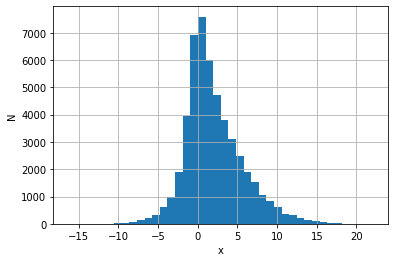

In [20]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the normal distributions to use
# and number of points per sample
mu= [0.,1.,2.,3.,4.]
sig= [1.,2.,3.,4.,5.]
N=10000
Nnormals= len(mu)
print(Nnormals)

# Superpose several normal samples 
x= np.array([])
for i in range(len(mu)):
    x= np.append(x,scp.norm.rvs(mu[i], sig[i], N))
    
# Plot histogram
h= plt.hist(x,40)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('N')

Next we apply the EM clustering algorithm with a Gaussian Mixture model. We start with a run with the "correct" number of clusters to check that we recover the parameters of the normal distributions.

In [21]:
# import sklearn as skl
from sklearn import mixture
import math

x= x.reshape(-1, 1)
em = mixture.GaussianMixture(n_components=Nnormals, covariance_type='full').fit(x)

for i in range(Nnormals):
    l= "Cluster {:2d}: w= {:.3f}  mu= {:.3f}  sig= {:-.3f}".\
        format(i,em.weights_[i],em.means_[i][0],math.sqrt(em.covariances_[i][0][0]))
    print(l)
print("LogL= ", em.lower_bound_)

Cluster  0: w= 0.076  mu= 9.586  sig= 2.749
Cluster  1: w= 0.260  mu= 2.430  sig= 1.223
Cluster  2: w= 0.168  mu= 5.558  sig= 1.582
Cluster  3: w= 0.095  mu= -2.727  sig= 2.417
Cluster  4: w= 0.400  mu= -0.100  sig= 1.108
LogL=  -2.626162550807494


Now we run EM with different numbers of clusters and collect the likelihood to trace a curve. The curve shows a change of slope at the right number of clusters, "the elbow criteria".

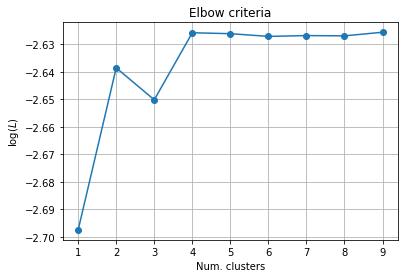

In [22]:
# import sklearn as skl
from sklearn import mixture
import matplotlib.pylab as plt

x= x.reshape(-1, 1)

logL= []
for i in range(1,Nnormals+5):
    em = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(x)
    logL.append(em.lower_bound_)

plt.xlabel("Num. clusters")
plt.ylabel("$\log(L)$")
plt.title("Elbow criteria")
plt.grid()
plt.plot(range(1,Nnormals+5),logL,marker="o")